 # Interactive Sudoku Solver



 This notebook provides a comprehensive interactive experience for processing Sudoku images. It guides you through the entire process from image detection to solution, with options for manual correction and hints.

In [2]:
# Import necessary packages
import os
import sys
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Add the src directory to the path so we can import our modules
sys.path.append('..')

# Import our modules
from src.processing.interactive_solver import InteractiveSudokuSolver
from src.utils import setup_project_paths


In [2]:
# Setup paths
paths = setup_project_paths()
print("Project paths:")
for key, path in paths.items():
    print(f"- {key}: {path}")


Project paths:
- project_root: /Users/matt/development/sudoku-ai
- data_dir: /Users/matt/development/sudoku-ai/data
- models_dir: /Users/matt/development/sudoku-ai/models
- notebooks_dir: /Users/matt/development/sudoku-ai/notebooks


 ## Initialize the Interactive Solver



 The interactive solver will automatically find and load the best available models.

In [3]:
# Initialize the interactive solver
solver = InteractiveSudokuSolver(
    confidence_threshold=0.5,
    models_dir=paths['models_dir']
)

print("Interactive Sudoku Solver initialized successfully!")


2025-05-20 15:51:42.214413: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M4
2025-05-20 15:51:42.214434: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-05-20 15:51:42.214440: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2025-05-20 15:51:42.214478: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-05-20 15:51:42.214495: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Found and loaded digit model: deeper_cnn_digits.h5
Found and loaded cell type model: deeper_cell_classifier.h5
Interactive Sudoku Solver initialized successfully!


 ## Set Your Image Path



 **IMPORTANT**: Update the `image_path` variable below with the path to your Sudoku image.

In [5]:
# 🎯 SET YOUR IMAGE PATH HERE
# Replace this with the path to your Sudoku image
image_path = os.path.join(paths['data_dir'], 'M2_test.jpg')

# Check if the file exists
if os.path.exists(image_path):
    print(f"✅ Image found: {image_path}")
else:
    print(f"❌ Image not found: {image_path}")
    print("\nAvailable test images in data directory:")
    
    # Look for available images
    data_dir = paths['data_dir']
    if os.path.exists(data_dir):
        image_files = [f for f in os.listdir(data_dir) 
                      if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
        
        if image_files:
            for img_file in image_files:
                print(f"  - {os.path.join(data_dir, img_file)}")
            
            # Use the first available image
            image_path = os.path.join(data_dir, image_files[0])
            print(f"\n🔄 Using first available image: {image_path}")
        else:
            print("  No image files found!")
            print("\n📋 To create test images, run the dataset generation notebook first.")


✅ Image found: /Users/matt/development/sudoku-ai/data/M2_test.jpg


 ## Process the Image



 Now let's process your Sudoku image and see the detection results.

2025-05-20 15:34:01.650274: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-05-20 15:34:01.768379: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


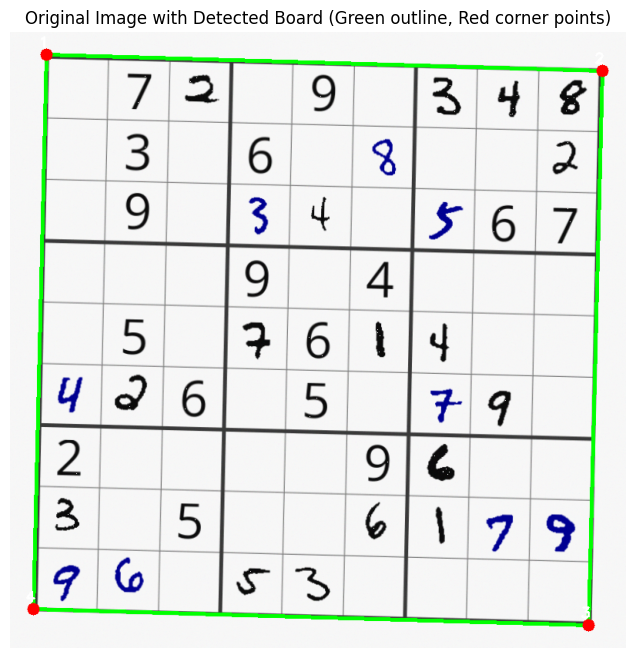

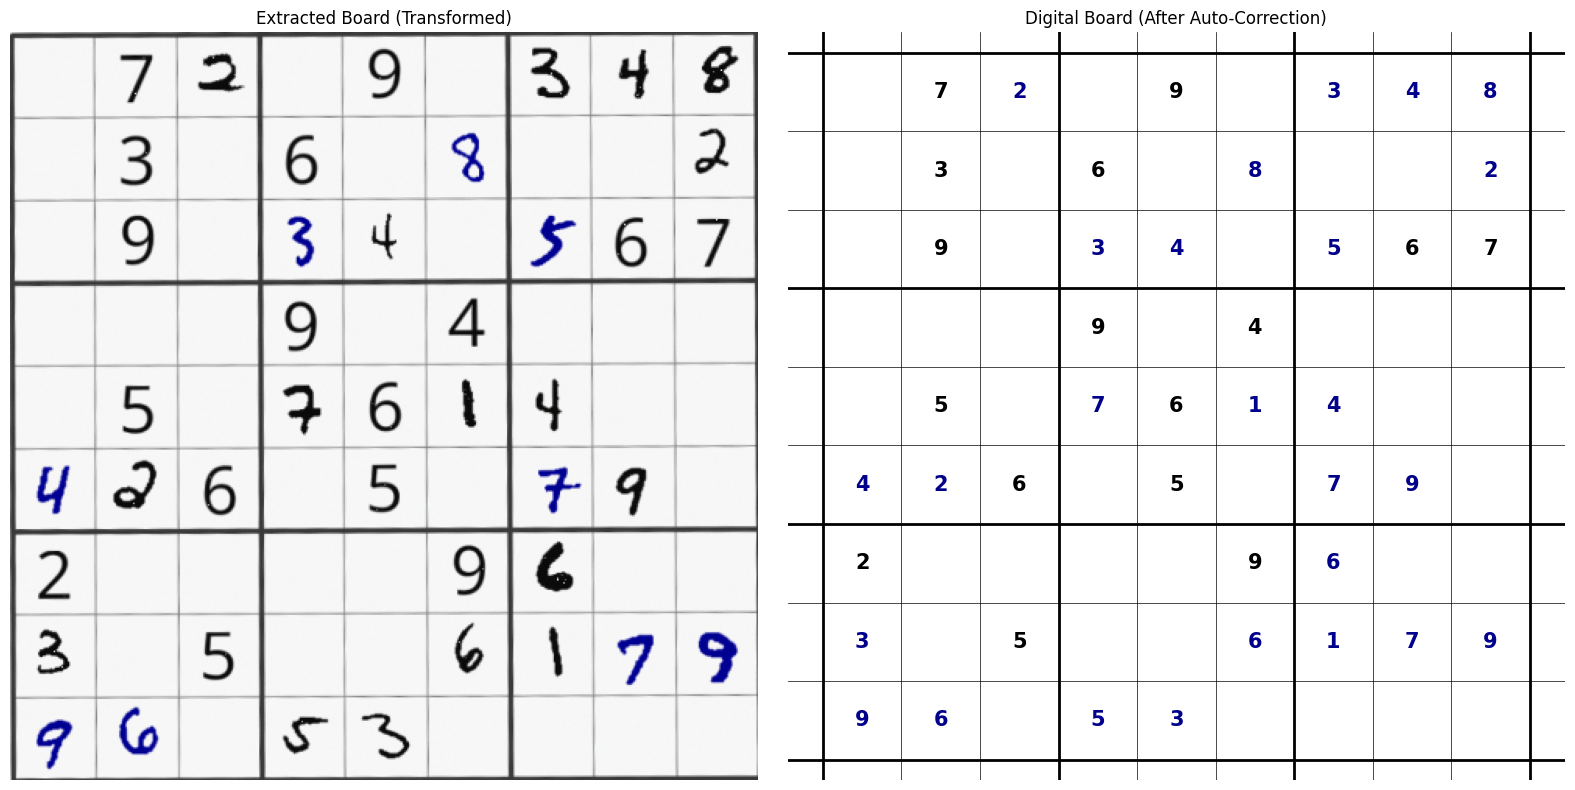


BOARD STATUS
Total Cells: 81
Filled Cells: 42
Empty Cells: 39
Handwritten Cells: 26
Printed Cells: 16
Fill Percentage: 51.85%
Is Valid: True
Mode: mixed
Average Confidence: 99.54%

✅ Board is VALID!

Next steps:
1. Get a hint for the next move
2. Show the complete solution


In [5]:
# Process the image and show detection results
success = solver.process_image(image_path, display_results=True)

if not success:
    print("❌ Failed to process the image. Please check:")
    print("1. The image path is correct")
    print("2. The image contains a clear Sudoku puzzle")
    print("3. The models are properly trained and available")


 ## Interactive Options



 Based on whether the board is valid or invalid, you'll have different options available.

In [6]:
# Check board status and show available options
if solver.current_board is not None:
    if solver.current_board.is_valid:
        print("🎉 Board is VALID! You can:")
        print("1. Get hints for solving")
        print("2. See the complete solution")
        print("3. Make manual corrections if needed")
    else:
        print("⚠️  Board is INVALID. You can:")
        print("1. View problematic cells")
        print("2. Make manual corrections")
        print("3. See detection results again")
else:
    print("❌ No board available for interaction.")


🎉 Board is VALID! You can:
1. Get hints for solving
2. See the complete solution
3. Make manual corrections if needed


 ## Option 1: View Problematic Cells (if board is invalid)



 If your board is invalid, let's identify and visualize the problematic handwritten cells.

In [ ]:
# Show problematic cells if the board is invalid
if solver.current_board is not None and not solver.current_board.is_valid:
    print("Analyzing problematic cells...")
    solver.show_problematic_cells()
else:
    print("Board is valid or not available - no problematic cells to show.")


 ## Option 2: Manual Cell Correction



 You can manually correct specific cells in the board. This is useful when:

 - The digit recognition made errors

 - You want to test different configurations

 - You need to fix problematic handwritten digits

In [ ]:
# Manual cell correction interface
# Uncomment the line below to start manual correction
# solver.manual_cell_correction()

print("Manual correction is available via: solver.manual_cell_correction()")
print("Instructions:")
print("- Enter corrections as 'row,col,value' (e.g., '2,3,5')")
print("- Multiple corrections: '2,3,5; 4,5,9'")
print("- Row and column indices are 0-8")
print("- Enter 'done' when finished")


 ## Option 3: Get a Hint (if board is valid)



 If your board is valid, you can get intelligent hints for the next move.

Getting a hint for your next move...


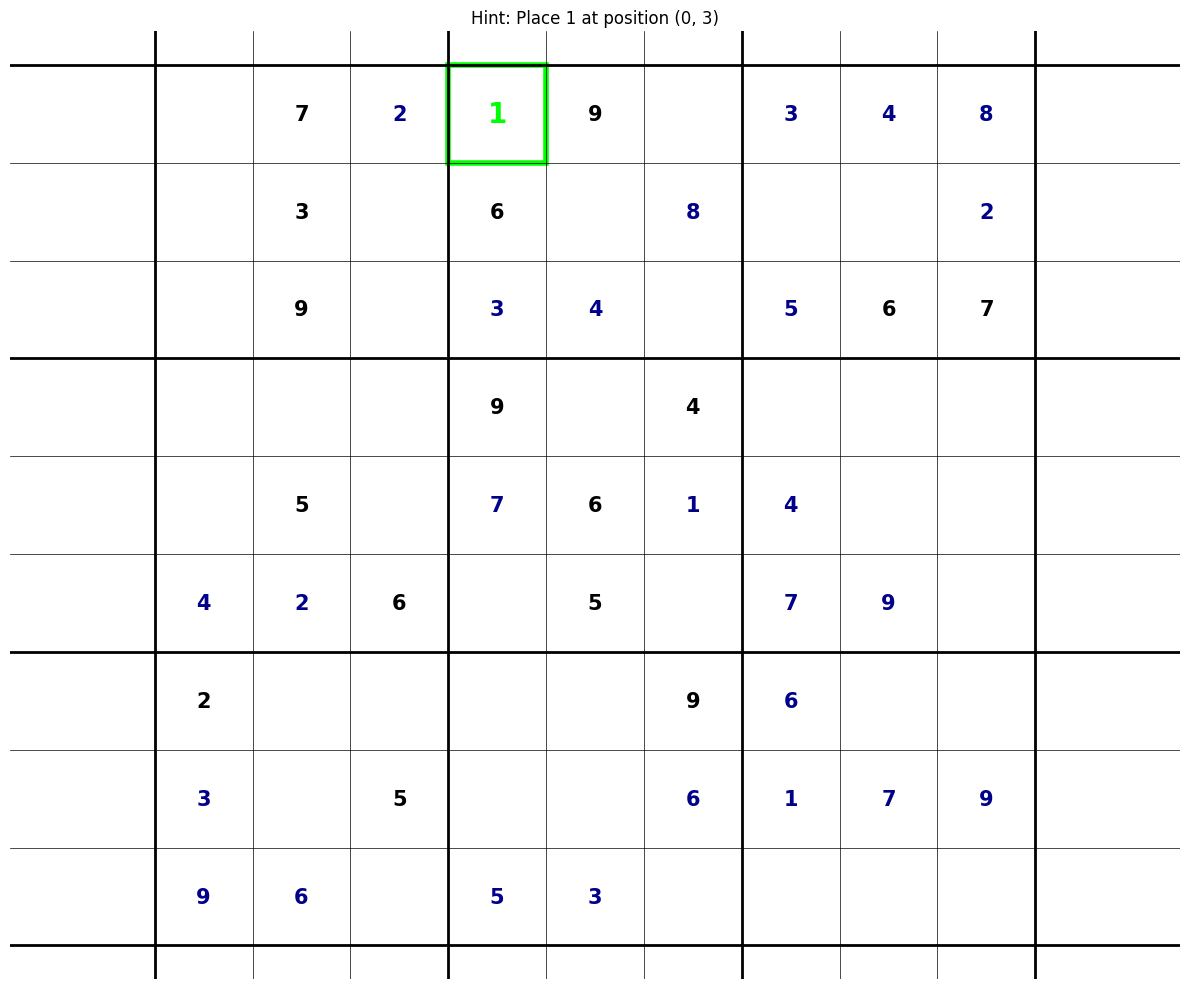


💡 HINT (EASY):
Place 1 at row 0, column 3
Reason: Only possible value for cell (0, 3)

📝 Apply this hint and run the cell again to get another hint!


In [7]:
# Get a hint if the board is valid
if solver.current_board is not None and solver.current_board.is_valid:
    print("Getting a hint for your next move...")
    hint = solver.suggest_hint()
    
    if hint:
        print(f"\n📝 Apply this hint and run the cell again to get another hint!")
    else:
        print("No hints available - the puzzle might be complete or very challenging.")
else:
    print("Board must be valid to get hints. Fix any issues first.")


 ## Option 4: Show Complete Solution (if board is valid)



 See the complete solution with color coding for different types of digits.

Solving the complete puzzle...
Solving the puzzle...


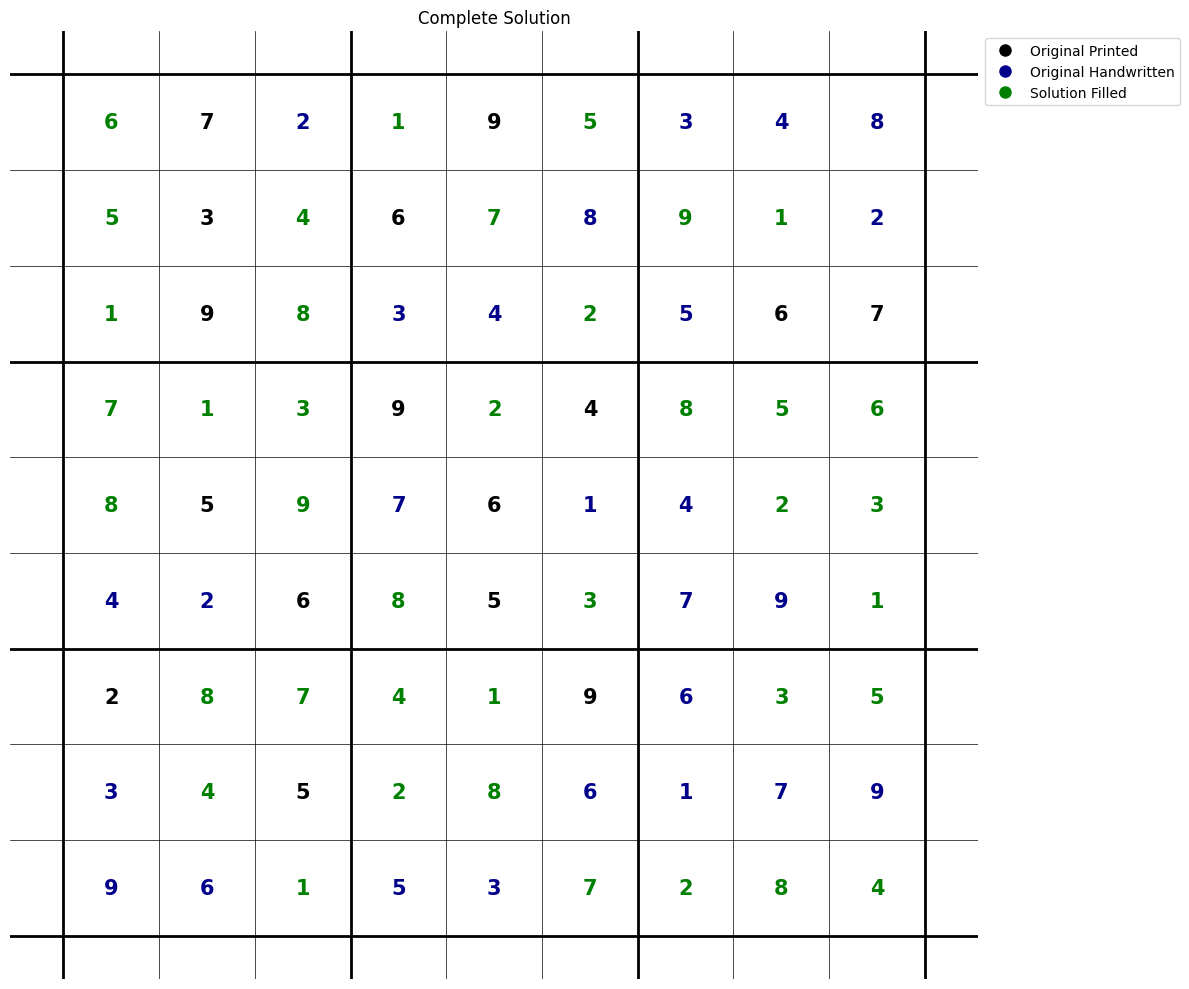

✅ Solution found and displayed!

Solution Statistics:
- Original filled cells: 42
- Cells filled by solution: 39
- Total cells: 81


In [8]:
# Show complete solution if the board is valid
if solver.current_board is not None and solver.current_board.is_valid:
    print("Solving the complete puzzle...")
    solver.show_complete_solution()
else:
    print("Board must be valid to show solution. Fix any issues first.")


 ## Option 5: Show Detection Results Again



 Re-display the detection and extraction results.

In [ ]:
# Show detection results again
if solver.original_image is not None:
    solver.show_detection_results()
else:
    print("No image processed yet.")


 ## Full Interactive Session



 For the complete experience, you can run a full interactive session that guides you through all options.

🧩 INTERACTIVE SUDOKU SOLVER


2025-05-20 15:52:07.139832: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-05-20 15:52:07.274255: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


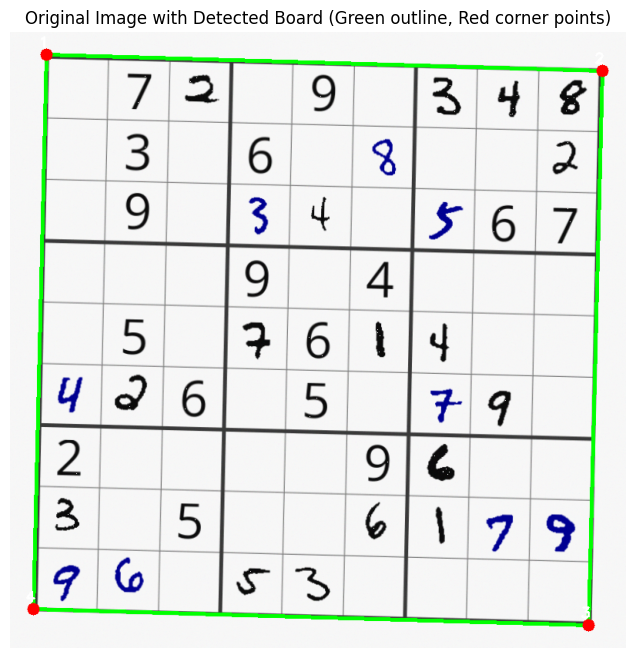

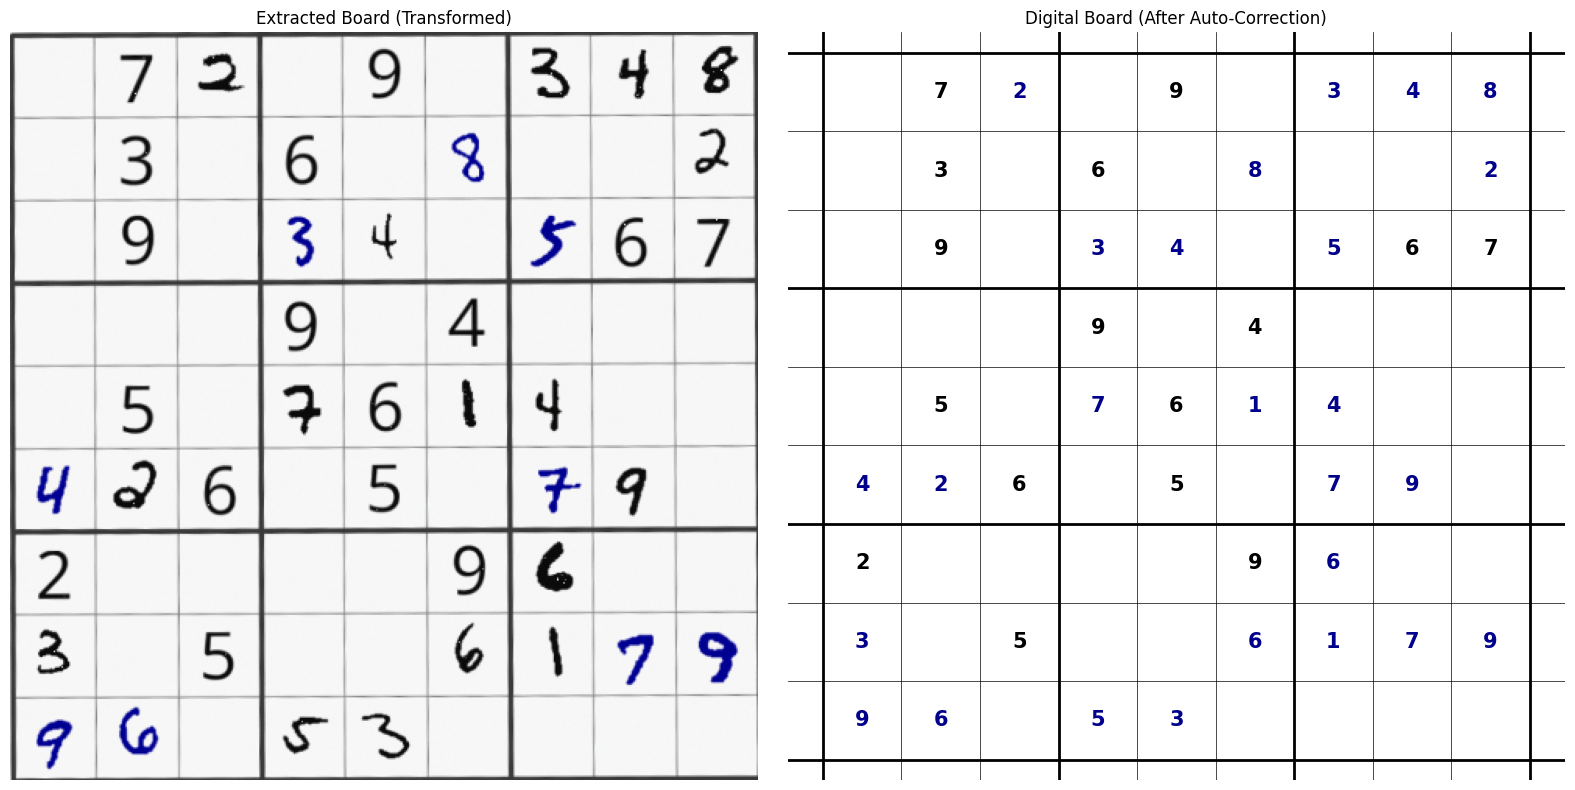


BOARD STATUS
Total Cells: 81
Filled Cells: 42
Empty Cells: 39
Handwritten Cells: 26
Printed Cells: 16
Fill Percentage: 51.85%
Is Valid: True
Mode: mixed
Average Confidence: 99.54%

✅ Board is VALID!

Next steps:
1. Get a hint for the next move
2. Show the complete solution

AVAILABLE OPTIONS:
1. Get a hint
2. Show complete solution
3. Manual cell correction
8. Show detection results again
9. Exit


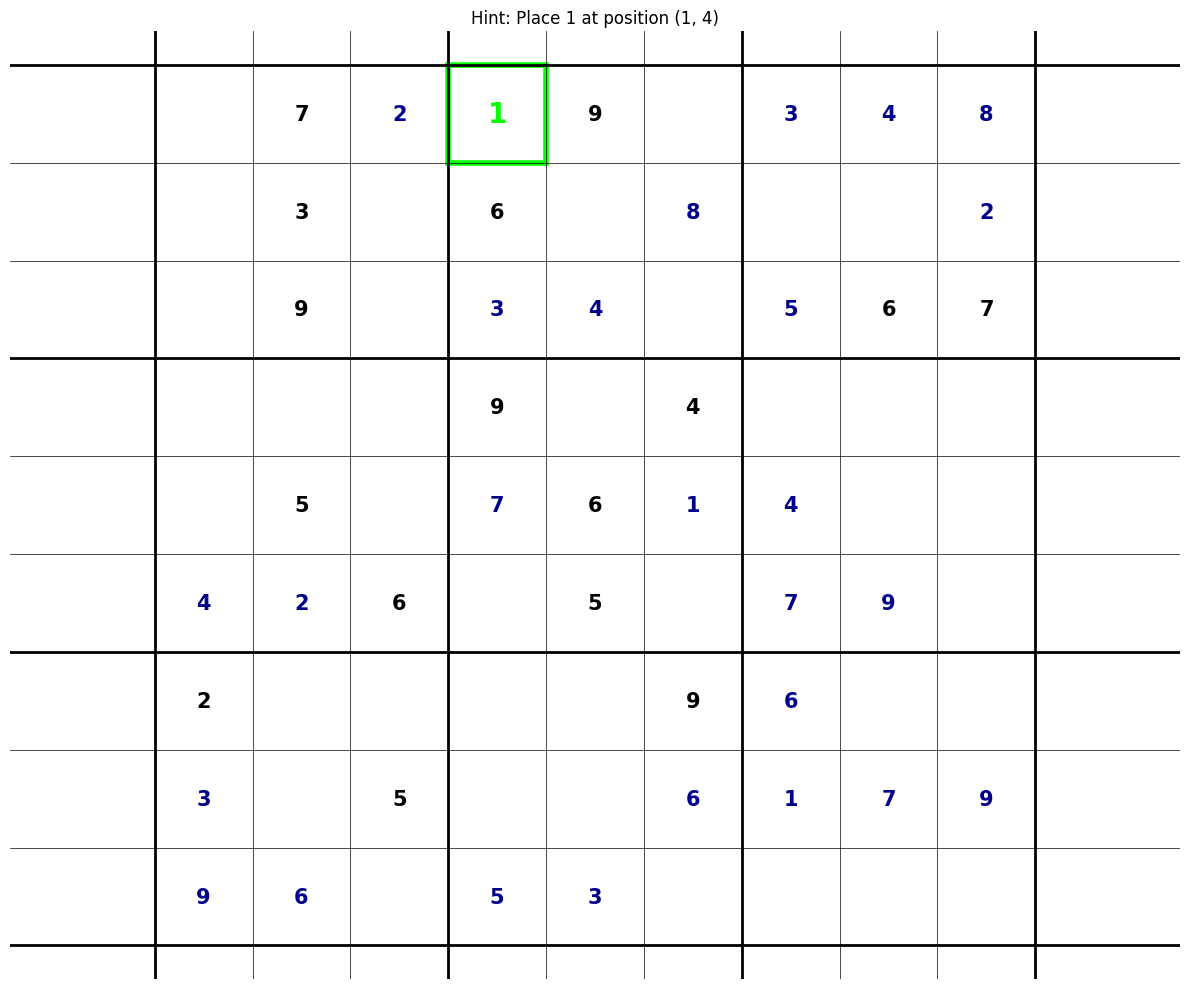


💡 HINT (EASY):
Place 1 at row 1, column 4
Reason: Only possible value for cell (1, 4)

Options:
- Enter 'apply' to apply this hint and get the next one
- Continue with other menu options to do something else
✅ Applied hint: Placed 1 at position (1, 4)

🔍 Getting next hint...


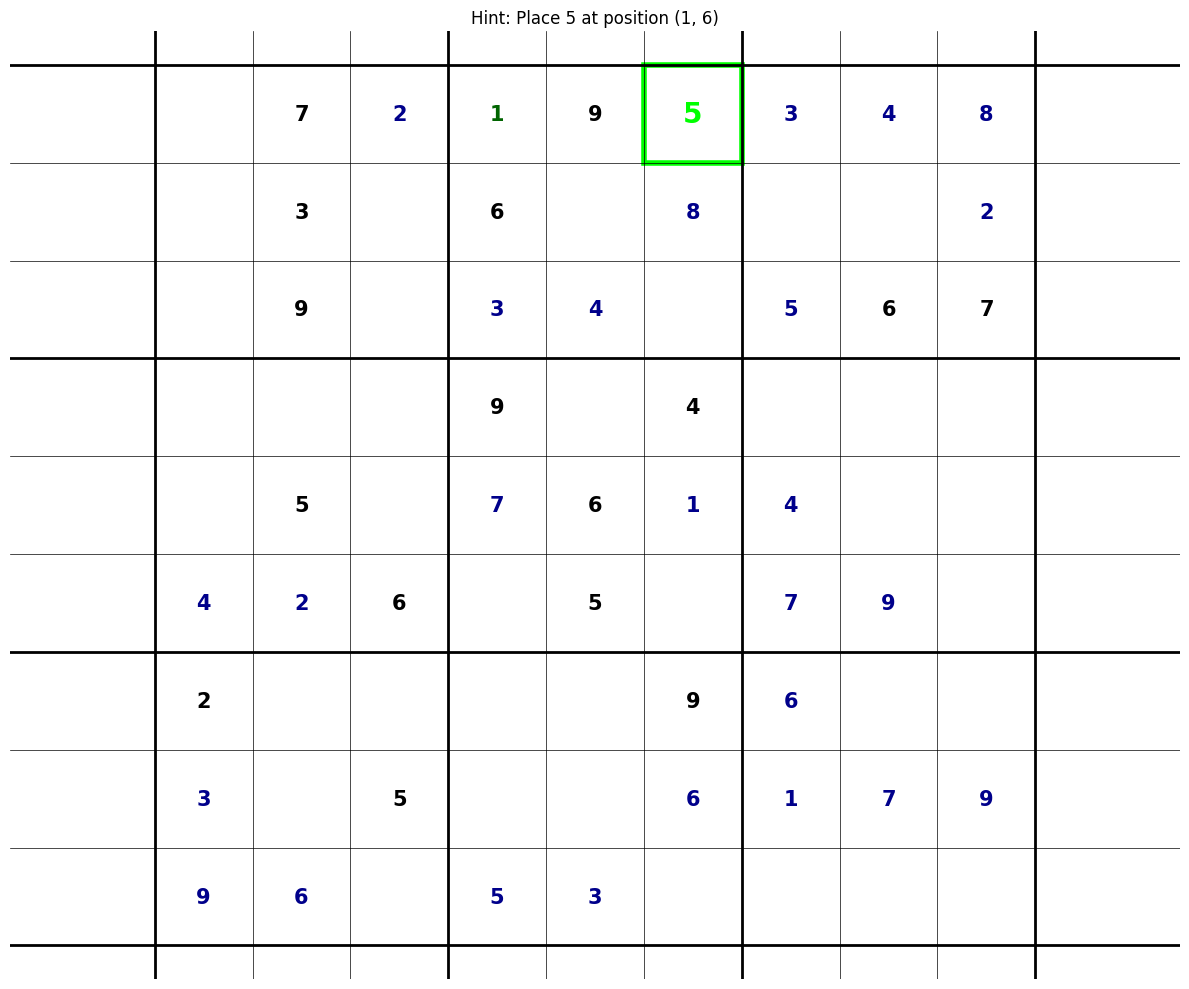


💡 HINT (EASY):
Place 5 at row 1, column 6
Reason: Only possible value for cell (1, 6)

Options:
- Enter 'apply' to apply this hint and get the next one
- Continue with other menu options to do something else

AVAILABLE OPTIONS:
1. Get a hint
2. Apply hint and show next
3. Show complete solution
4. Manual cell correction
8. Show detection results again
9. Exit
Invalid choice. Please try again.
✅ Applied hint: Placed 5 at position (1, 6)

🔍 Getting next hint...


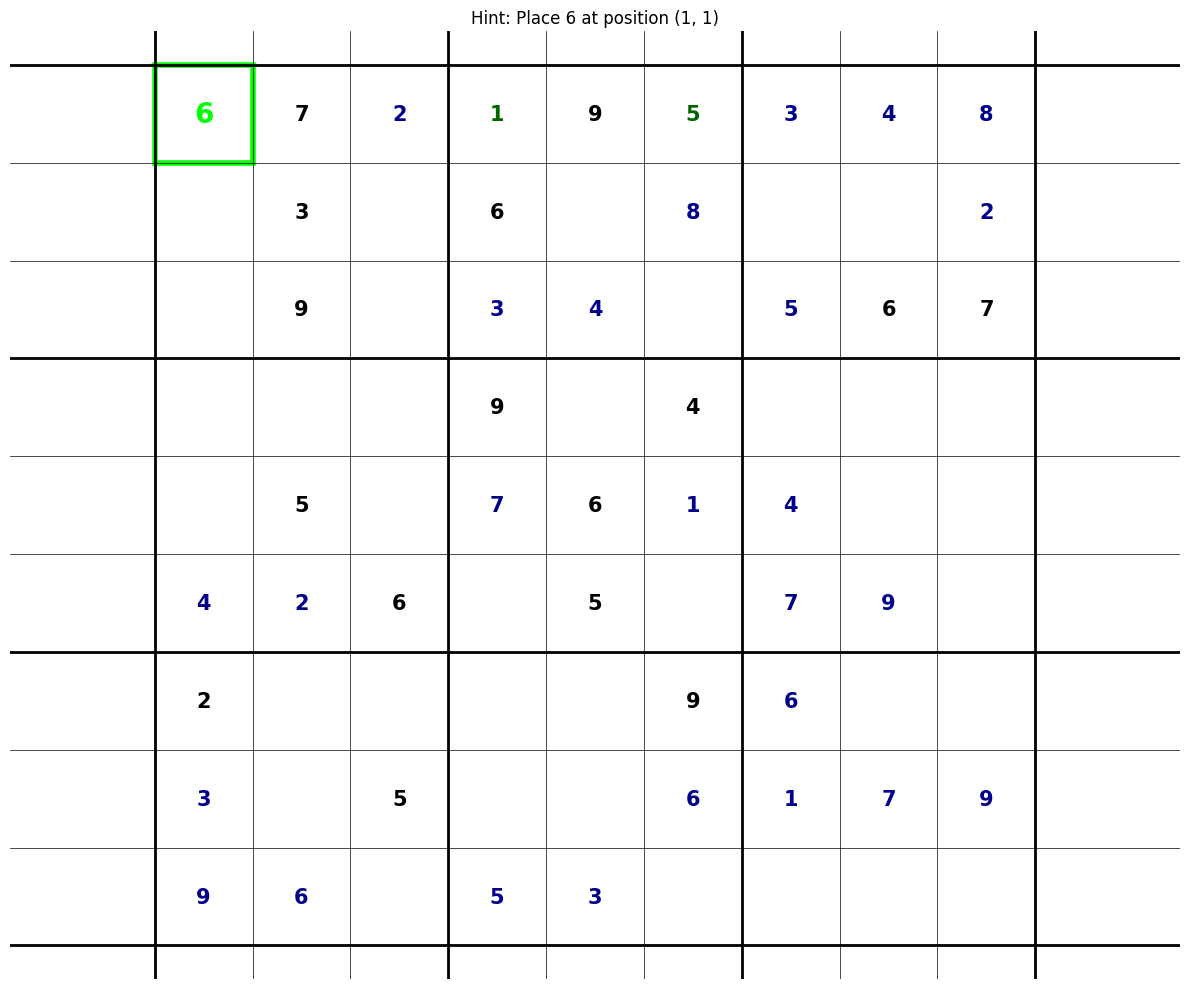


💡 HINT (EASY):
Place 6 at row 1, column 1
Reason: Only possible value for cell (1, 1)

Options:
- Enter 'apply' to apply this hint and get the next one
- Continue with other menu options to do something else

AVAILABLE OPTIONS:
1. Get a hint
2. Apply hint and show next
3. Show complete solution
4. Manual cell correction
8. Show detection results again
9. Exit
Invalid choice. Please try again.
✅ Applied hint: Placed 6 at position (1, 1)

🔍 Getting next hint...


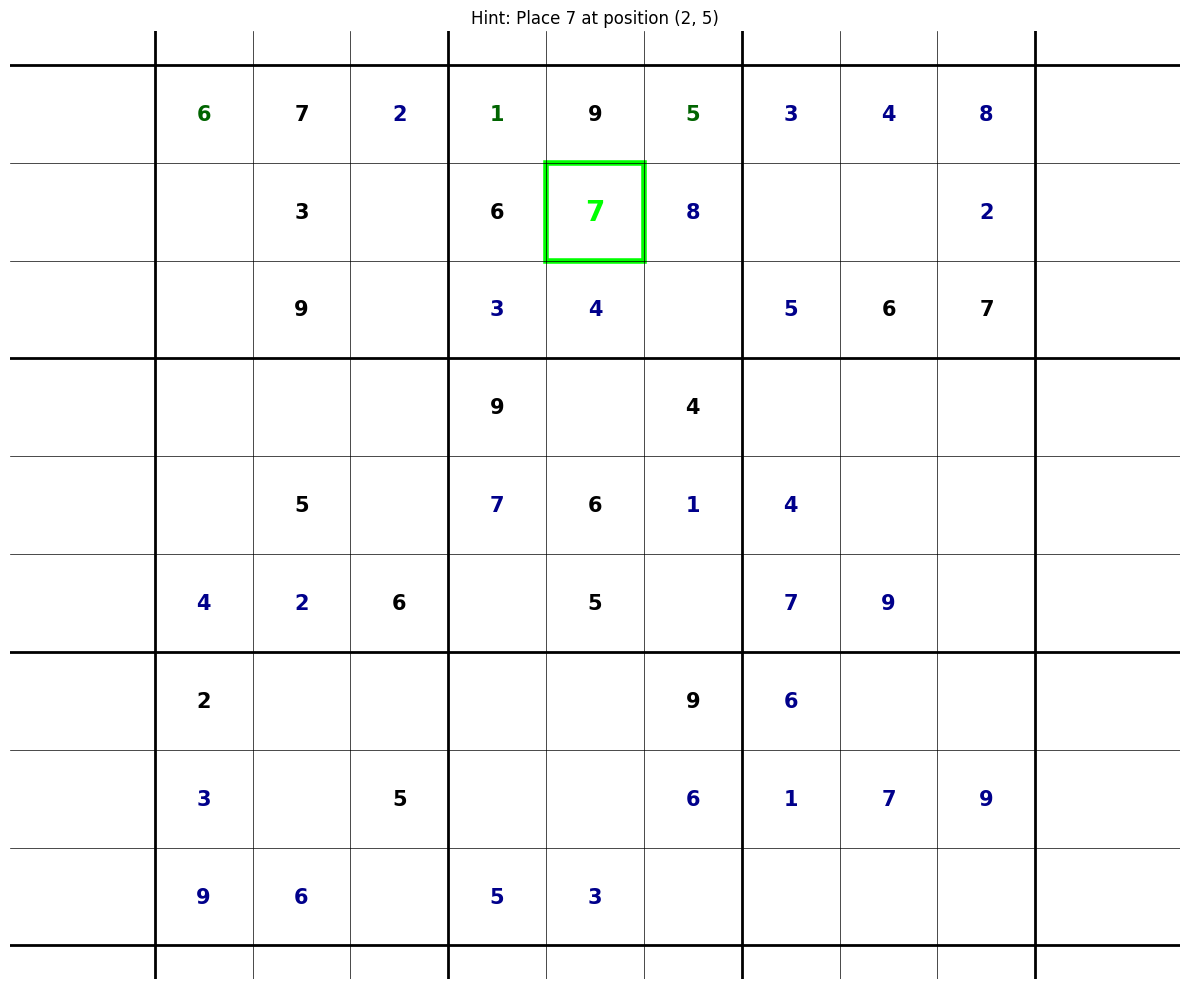


💡 HINT (EASY):
Place 7 at row 2, column 5
Reason: Only possible value for cell (2, 5)

Options:
- Enter 'apply' to apply this hint and get the next one
- Continue with other menu options to do something else

AVAILABLE OPTIONS:
1. Get a hint
2. Apply hint and show next
3. Show complete solution
4. Manual cell correction
8. Show detection results again
9. Exit
Invalid choice. Please try again.

AVAILABLE OPTIONS:
1. Get a hint
2. Apply hint and show next
3. Show complete solution
4. Manual cell correction
8. Show detection results again
9. Exit
Invalid choice. Please try again.
✅ Applied hint: Placed 7 at position (2, 5)

🔍 Getting next hint...


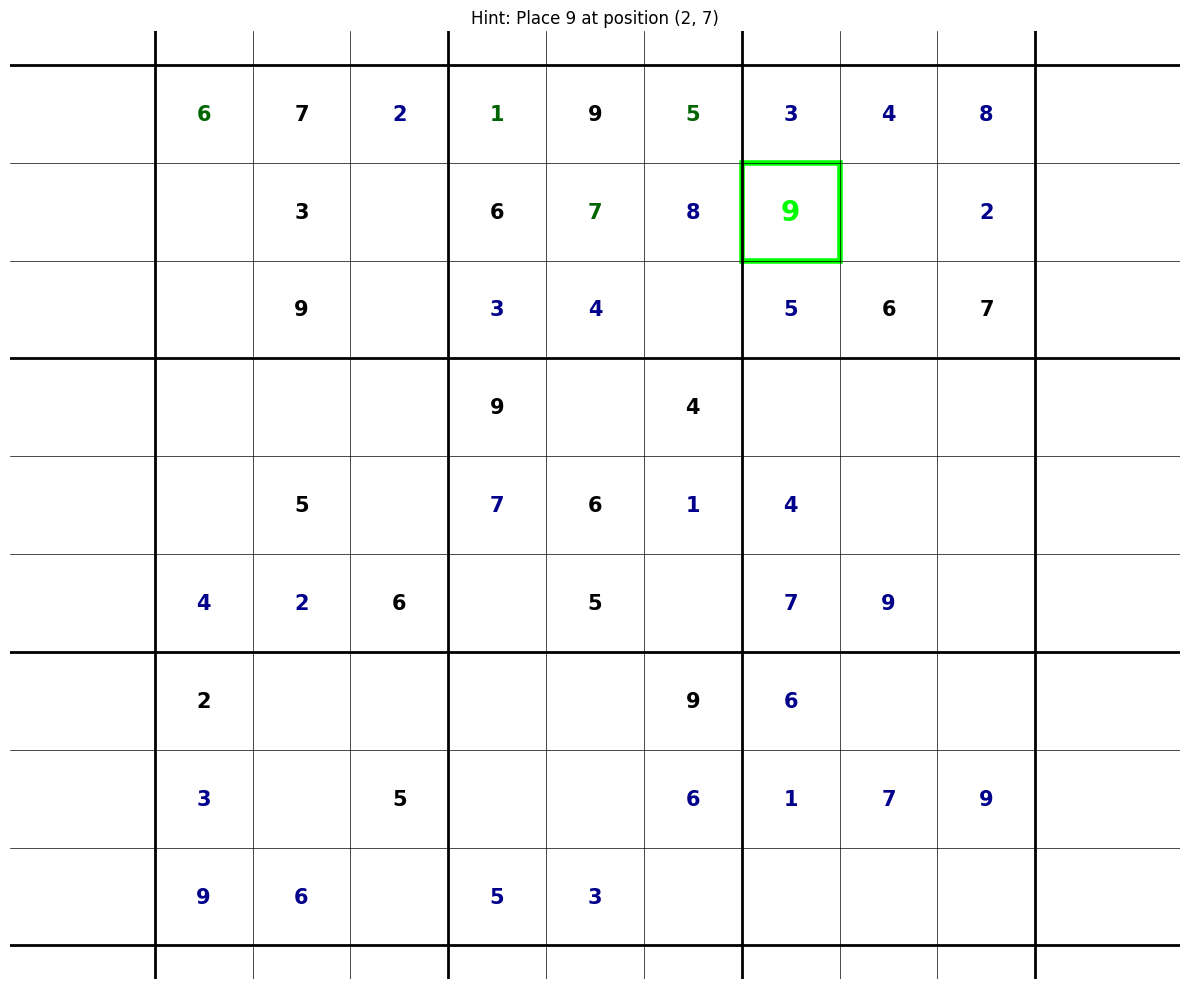


💡 HINT (EASY):
Place 9 at row 2, column 7
Reason: Only possible value for cell (2, 7)

Options:
- Enter 'apply' to apply this hint and get the next one
- Continue with other menu options to do something else

AVAILABLE OPTIONS:
1. Get a hint
2. Apply hint and show next
3. Show complete solution
4. Manual cell correction
8. Show detection results again
9. Exit
Invalid choice. Please try again.

AVAILABLE OPTIONS:
1. Get a hint
2. Apply hint and show next
3. Show complete solution
4. Manual cell correction
8. Show detection results again
9. Exit
✅ Applied hint: Placed 9 at position (2, 7)

🔍 Getting next hint...


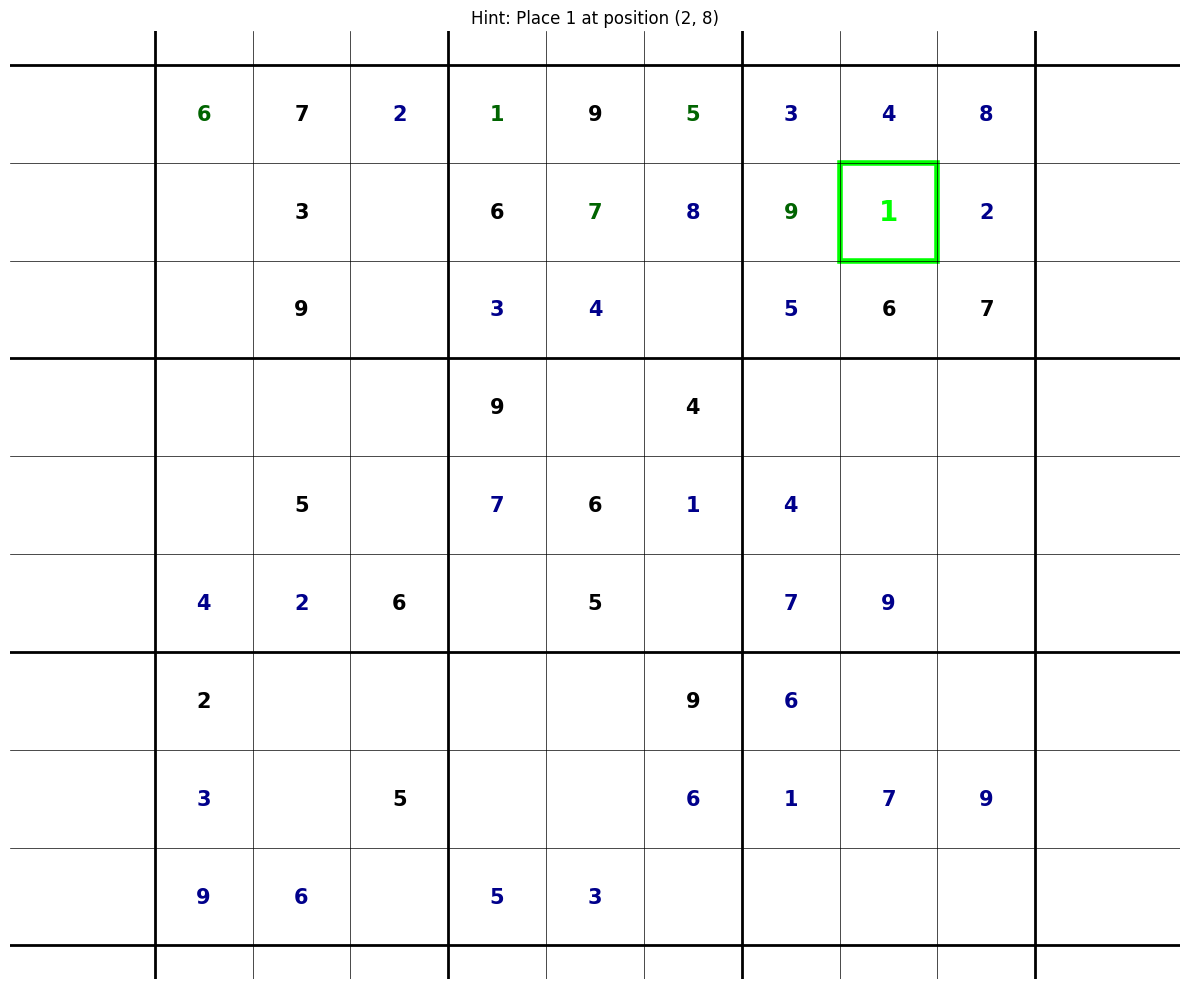


💡 HINT (EASY):
Place 1 at row 2, column 8
Reason: Only possible value for cell (2, 8)

Options:
- Enter 'apply' to apply this hint and get the next one
- Continue with other menu options to do something else

AVAILABLE OPTIONS:
1. Get a hint
2. Apply hint and show next
3. Show complete solution
4. Manual cell correction
8. Show detection results again
9. Exit
✅ Applied hint: Placed 1 at position (2, 8)

🔍 Getting next hint...


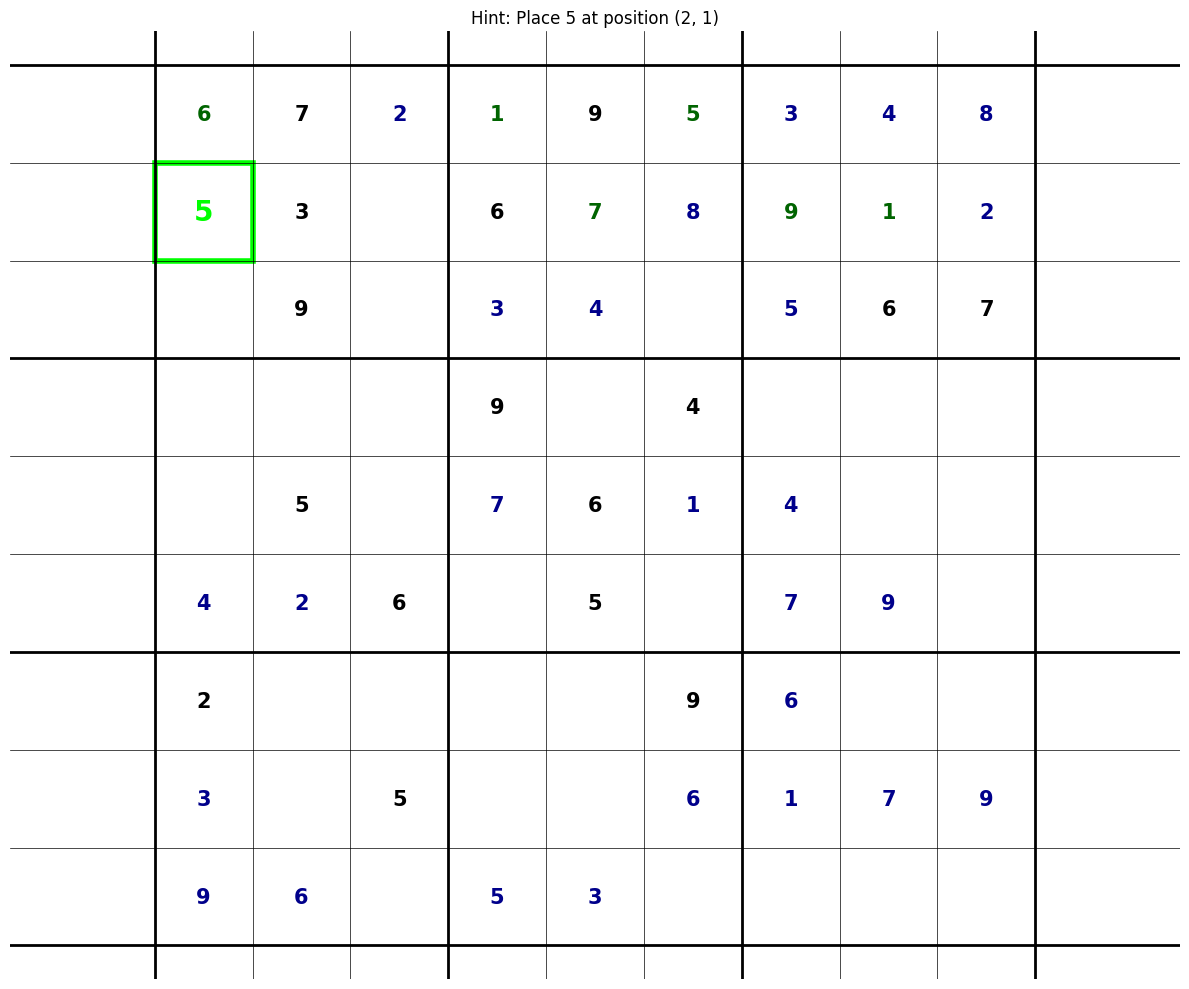


💡 HINT (EASY):
Place 5 at row 2, column 1
Reason: Only possible value for cell (2, 1)

Options:
- Enter 'apply' to apply this hint and get the next one
- Continue with other menu options to do something else

AVAILABLE OPTIONS:
1. Get a hint
2. Apply hint and show next
3. Show complete solution
4. Manual cell correction
8. Show detection results again
9. Exit
✅ Applied hint: Placed 5 at position (2, 1)

🔍 Getting next hint...


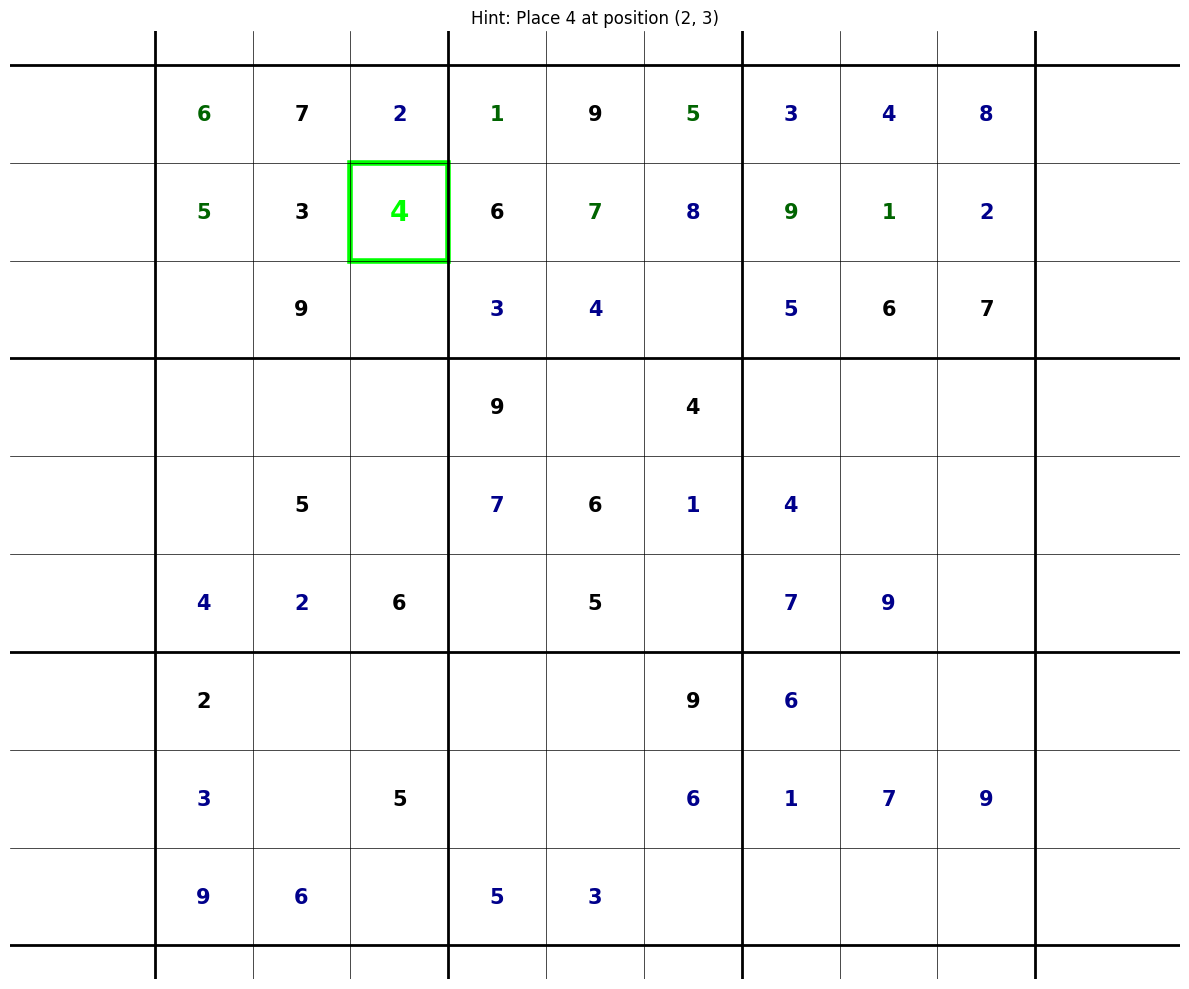


💡 HINT (EASY):
Place 4 at row 2, column 3
Reason: Only possible value for cell (2, 3)

Options:
- Enter 'apply' to apply this hint and get the next one
- Continue with other menu options to do something else

AVAILABLE OPTIONS:
1. Get a hint
2. Apply hint and show next
3. Show complete solution
4. Manual cell correction
8. Show detection results again
9. Exit
✅ Applied hint: Placed 4 at position (2, 3)

🔍 Getting next hint...


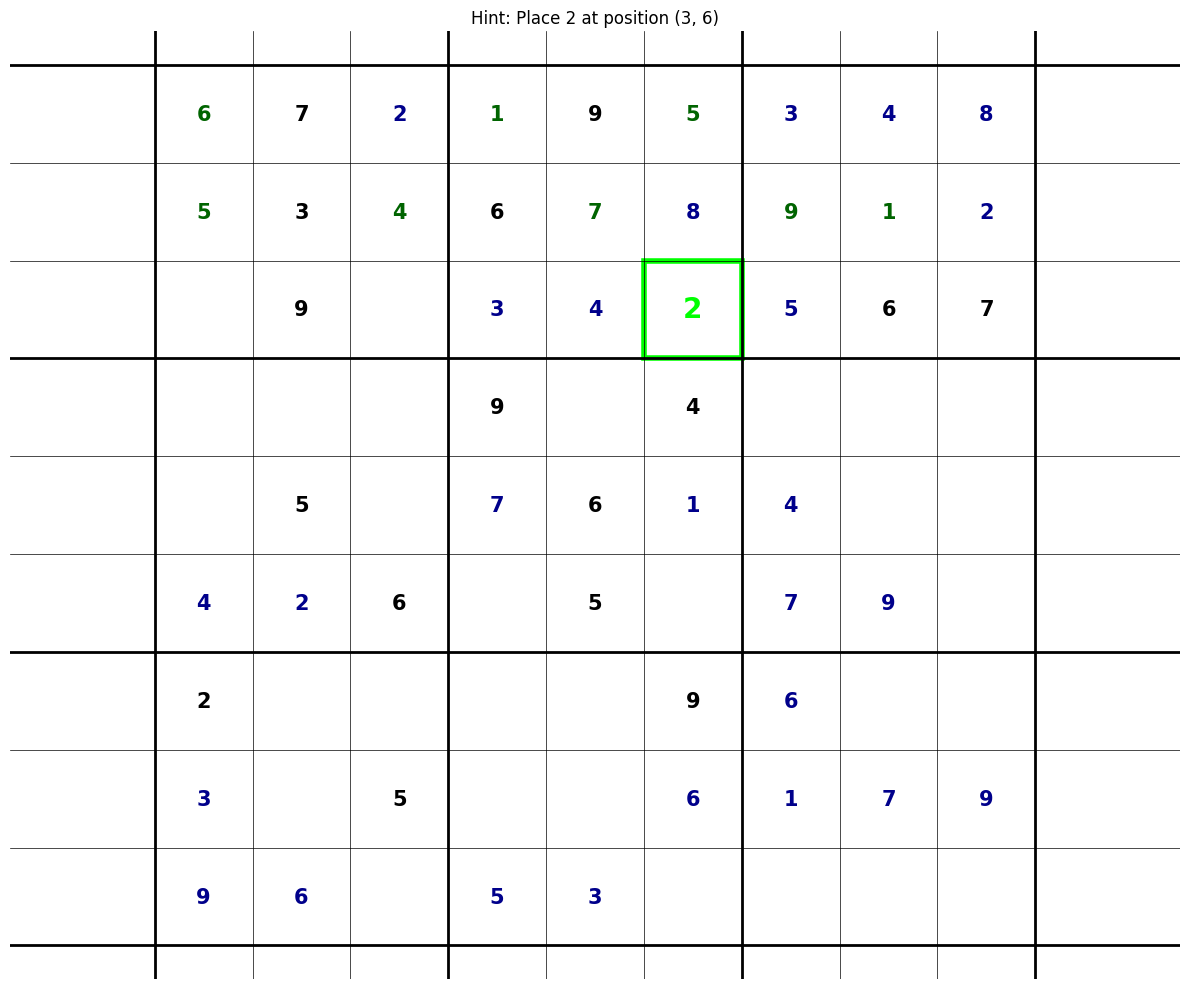


💡 HINT (EASY):
Place 2 at row 3, column 6
Reason: Only possible value for cell (3, 6)

Options:
- Enter 'apply' to apply this hint and get the next one
- Continue with other menu options to do something else

AVAILABLE OPTIONS:
1. Get a hint
2. Apply hint and show next
3. Show complete solution
4. Manual cell correction
8. Show detection results again
9. Exit
✅ Applied hint: Placed 2 at position (3, 6)

🔍 Getting next hint...


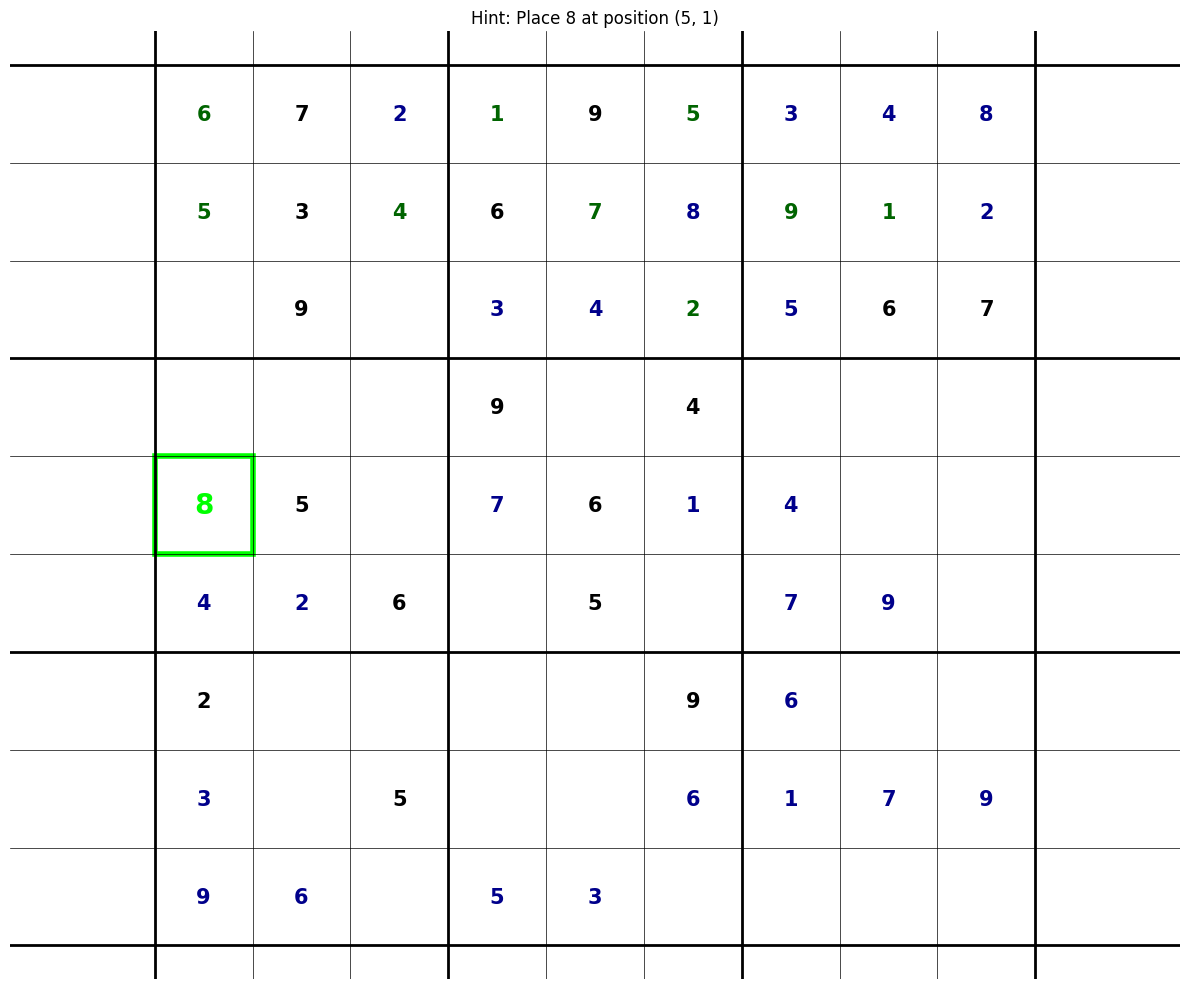


💡 HINT (EASY):
Place 8 at row 5, column 1
Reason: Only possible value for cell (5, 1)

Options:
- Enter 'apply' to apply this hint and get the next one
- Continue with other menu options to do something else

AVAILABLE OPTIONS:
1. Get a hint
2. Apply hint and show next
3. Show complete solution
4. Manual cell correction
8. Show detection results again
9. Exit
Invalid choice. Please try again.

AVAILABLE OPTIONS:
1. Get a hint
2. Apply hint and show next
3. Show complete solution
4. Manual cell correction
8. Show detection results again
9. Exit
Thank you for using the Interactive Sudoku Solver! 👋
Full interactive session is available via:
solver.interactive_session(image_path)

This will provide a menu-driven interface with all available options.


In [6]:
# Run a complete interactive session
# Uncomment the line below to start the full interactive experience
solver.interactive_session(image_path)

print("Full interactive session is available via:")
print("solver.interactive_session(image_path)")
print("\nThis will provide a menu-driven interface with all available options.")


 ## Try Different Images



 You can easily test the solver with different images by changing the image path and rerunning the processing.

In [ ]:
def test_multiple_images():
    """Test the solver with multiple images if available."""
    data_dir = paths['data_dir']
    
    if not os.path.exists(data_dir):
        print("Data directory not found.")
        return
    
    # Find all image files
    image_files = [f for f in os.listdir(data_dir) 
                  if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    
    if len(image_files) <= 1:
        print("Need multiple images for batch testing.")
        return
    
    print(f"Found {len(image_files)} images. Testing each...")
    
    results = []
    for img_file in image_files[:3]:  # Test first 3 images
        img_path = os.path.join(data_dir, img_file)
        print(f"\n{'='*50}")
        print(f"Testing: {img_file}")
        print('='*50)
        
        # Create a new solver instance for each test
        test_solver = InteractiveSudokuSolver(
            confidence_threshold=0.5,
            models_dir=paths['models_dir']
        )
        
        success = test_solver.process_image(img_path, display_results=False)
        
        if success:
            is_valid = test_solver.current_board.is_valid
            stats = test_solver.current_board.get_stats()
            
            results.append({
                'file': img_file,
                'success': True,
                'valid': is_valid,
                'filled_cells': stats['filled_cells'],
                'mode': stats['mode']
            })
            
            print(f"✅ Processed successfully")
            print(f"   Valid: {'Yes' if is_valid else 'No'}")
            print(f"   Filled cells: {stats['filled_cells']}")
            print(f"   Mode: {stats['mode']}")
        else:
            results.append({
                'file': img_file,
                'success': False,
                'valid': False,
                'filled_cells': 0,
                'mode': 'unknown'
            })
            print(f"❌ Failed to process")
    
    # Summary
    print(f"\n{'='*50}")
    print("BATCH TEST SUMMARY")
    print('='*50)
    
    successful = sum(1 for r in results if r['success'])
    valid_boards = sum(1 for r in results if r['valid'])
    
    print(f"Images processed: {len(results)}")
    print(f"Successful extractions: {successful}")
    print(f"Valid boards: {valid_boards}")
    
    for result in results:
        status = "✅" if result['success'] else "❌"
        validity = "Valid" if result['valid'] else "Invalid"
        print(f"{status} {result['file']:<25} {validity:<8} {result['filled_cells']} cells")

# Run batch testing (uncomment to enable)
# test_multiple_images()

print("Batch testing is available via: test_multiple_images()")


 ## Generate Test Images



 If you don't have test images, you can generate some synthetic ones for testing.

In [ ]:
def generate_test_images():
    """Generate some test images for demonstration."""
    try:
        from src.generator import (
            SudokuGeneratorConfig, 
            SudokuImageGenerator, 
            SudokuPuzzleGenerator
        )
        import random
        
        print("Generating test images...")
        
        # Create generators
        config = SudokuGeneratorConfig(
            digit_config={"vertical_alignment_offset": 5}
        )
        puzzle_generator = SudokuPuzzleGenerator(config)
        image_generator = SudokuImageGenerator(config)
        
        # Generate different types of puzzles
        test_configs = [
            {"mode": "printed", "difficulty": "easy", "style": "paper_color"},
            {"mode": "mixed", "difficulty": "medium", "style": "unified"},
            {"mode": "handwritten", "difficulty": "hard", "style": "texture"},
        ]
        
        generated_files = []
        
        for i, test_config in enumerate(test_configs):
            # Generate puzzle
            grid, solution = puzzle_generator.generate(mask_rate=0.5)
            
            # Calculate handwritten positions for mixed mode
            if test_config["mode"] == "mixed":
                non_empty_positions = [(r, c) for r in range(9) for c in range(9) if grid[r, c] != 0]
                handwritten_count = len(non_empty_positions) // 2
                handwritten_positions = set(random.sample(non_empty_positions, handwritten_count))
            elif test_config["mode"] == "handwritten":
                handwritten_positions = {(r, c) for r in range(9) for c in range(9) if grid[r, c] != 0}
            else:
                handwritten_positions = set()
            
            # Generate image
            image, _ = image_generator.generate_image(
                grid=grid,
                mode=test_config["mode"],
                difficulty=test_config["difficulty"],
                background_style=test_config["style"],
                handwritten_positions=handwritten_positions
            )
            
            # Save image
            filename = f'interactive_test_{i+1}_{test_config["mode"]}_{test_config["difficulty"]}.png'
            filepath = os.path.join(paths['data_dir'], filename)
            cv2.imwrite(filepath, cv2.cvtColor(image, cv2.COLOR_RGB2BGR))
            generated_files.append(filepath)
            
            print(f"✅ Generated: {filename}")
        
        print(f"\n🎉 Generated {len(generated_files)} test images in {paths['data_dir']}")
        print("You can now use these images with the interactive solver!")
        
        return generated_files
        
    except ImportError as e:
        print(f"Could not import generator modules: {e}")
        print("Make sure the generator components are available.")
        return []

# Generate test images (uncomment to enable)
# generated_images = generate_test_images()

print("Test image generation is available via: generate_test_images()")


 ## Summary



 This interactive Sudoku solver provides a comprehensive solution for processing Sudoku images:



 ### Features:

 1. **Image Detection**: Shows original image with detected board outline and corners

 2. **Board Extraction**: Displays side-by-side comparison of extracted vs digital board

 3. **Automatic Correction**: Attempts to fix recognition errors automatically

 4. **Problem Analysis**: Identifies problematic handwritten digits that cause invalid boards

 5. **Manual Correction**: Allows you to override specific cells

 6. **Intelligent Hints**: Suggests the best next move for valid boards

 7. **Complete Solution**: Shows the full solution with color coding



 ### Color Coding:

 - **Black**: Printed digits (original)

 - **Dark Blue**: Handwritten digits (original)

 - **Red**: Problematic handwritten digits

 - **Green**: Digits filled by the solution

 - **Lime**: Hint suggestions



 ### Usage Tips:

 1. Start with a clear image of a Sudoku puzzle

 2. Let the system process and correct the board automatically

 3. If invalid, examine problematic cells and make manual corrections

 4. If valid, get hints or see the complete solution

 5. Use the interactive session for the full guided experience



 The system is designed to handle real-world challenges like unclear handwriting, perspective distortion, and recognition errors while providing a user-friendly interface for interaction and correction.

In [ ]:
print("🧩 Interactive Sudoku Solver - Ready for Use!")
print("\nQuick Start:")
print("1. Set your image path in the image_path variable")
print("2. Run solver.process_image(image_path)")
print("3. Use the available options based on board validity")
print("4. For full experience: solver.interactive_session(image_path)")